# !Usage!
1. Generate the metadata with create-metadataset.ipynb
2. Insert path to results CSV Below
3. Run all cells
4. View the plots, explore the tabels in your IDE, and view the images with the dashboard using their tile_id

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
path = '../data/processed/results.csv'

In [14]:
# Load the processed metadataset
metadataset = pd.read_csv('../data/processed/metadata.csv', index_col=0)
metadataset

,cloud,land,missing_landsat,kelp,in_train
tile_id,,,,,
JW725114,0.008294,0.142604,0.000000,0.000082,True
UX493605,0.004155,0.303135,0.000000,0.007404,True
OU500661,0.039673,0.254376,0.000000,0.000000,True
DC227980,0.009371,0.429110,0.000000,0.000000,True
SS602790,0.061763,0.837020,0.000000,0.000000,True
...,...,...,...,...,...
UT495238,0.297796,0.601306,0.296580,NaN,False
GE987629,0.307053,0.125967,0.307020,NaN,False
EN974536,0.348498,0.714710,0.348269,NaN,False


Load prediction results csv to analyze performance

In [15]:
# Load the prediction results
results = pd.read_csv(path, index_col=0)
results

,pred_sum,target_sum,intersection,dice_coef
image_key,,,,
AA800151,2820.854492,198,197.212738,0.130654
AD819150,2243.988281,1758,1262.307251,0.630840
AF191061,1923.189819,1632,1252.291382,0.704486
AG525529,17.103409,0,0.000000,0.000000
AG705659,2181.978760,1149,965.362244,0.579627
...,...,...,...,...
ZY643171,21.695826,0,0.000000,0.000000
ZY775733,21.746630,0,0.000000,0.000000
ZZ305703,118.021545,1056,96.676666,0.164693


Join the results with the metadata

In [16]:
results = results.join(metadataset)
results

,pred_sum,target_sum,intersection,dice_coef,cloud,land,missing_landsat,kelp,in_train
image_key,,,,,,,,,
AA800151,2820.854492,198,197.212738,0.130654,0.001616,0.103331,0.000000,0.001616,True
AD819150,2243.988281,1758,1262.307251,0.630840,0.198645,0.688653,0.196931,0.014351,True
AF191061,1923.189819,1632,1252.291382,0.704486,0.010245,0.366939,0.000000,0.013322,True
AG525529,17.103409,0,0.000000,0.000000,0.083869,0.000000,0.000000,0.000000,True
AG705659,2181.978760,1149,965.362244,0.579627,0.015543,0.606122,0.000000,0.009380,True
...,...,...,...,...,...,...,...,...,...
ZY643171,21.695826,0,0.000000,0.000000,0.000065,0.099396,0.000000,0.000000,True
ZY775733,21.746630,0,0.000000,0.000000,0.000082,0.544612,0.000000,0.000000,True
ZZ305703,118.021545,1056,96.676666,0.164693,0.108588,0.606016,0.000000,0.008620,True


# Compute error
Error is roughly "how much would our score increase if we had perfect predictions for this error"
Lower is better.

In [17]:
# compute error (difference between dice if prediction would've been perfect and actual dice)
total_intersection = results['intersection'].sum()
total_pred_target_sum = results['pred_sum'].sum() + results['target_sum'].sum()

perfect_dice_coef = (2*results['intersection']+total_intersection) / (2*results['intersection'] + total_pred_target_sum)
actual_dice_coef = (2*results['intersection']+total_intersection) / (results['pred_sum'] + results['target_sum'] + total_pred_target_sum)
results['error'] = perfect_dice_coef - actual_dice_coef
results

,pred_sum,target_sum,intersection,dice_coef,cloud,land,missing_landsat,kelp,in_train,error
image_key,,,,,,,,,,
AA800151,2820.854492,198,197.212738,0.130654,0.001616,0.103331,0.000000,0.001616,True,0.000429
AD819150,2243.988281,1758,1262.307251,0.630840,0.198645,0.688653,0.196931,0.014351,True,0.000242
AF191061,1923.189819,1632,1252.291382,0.704486,0.010245,0.366939,0.000000,0.013322,True,0.000172
AG525529,17.103409,0,0.000000,0.000000,0.083869,0.000000,0.000000,0.000000,True,0.000003
AG705659,2181.978760,1149,965.362244,0.579627,0.015543,0.606122,0.000000,0.009380,True,0.000229
...,...,...,...,...,...,...,...,...,...,...
ZY643171,21.695826,0,0.000000,0.000000,0.000065,0.099396,0.000000,0.000000,True,0.000004
ZY775733,21.746630,0,0.000000,0.000000,0.000082,0.544612,0.000000,0.000000,True,0.000004
ZZ305703,118.021545,1056,96.676666,0.164693,0.108588,0.606016,0.000000,0.008620,True,0.000161


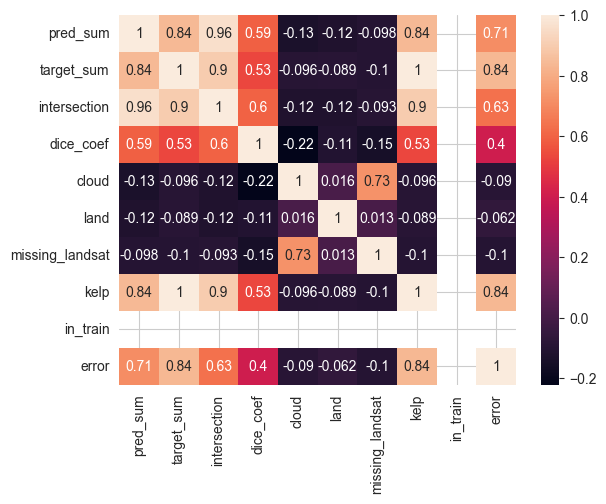

In [18]:
# Plot the correlation matrix with sns
corr = results.corr()
sns.heatmap(corr, annot=True)
plt.show()

# Plots against error

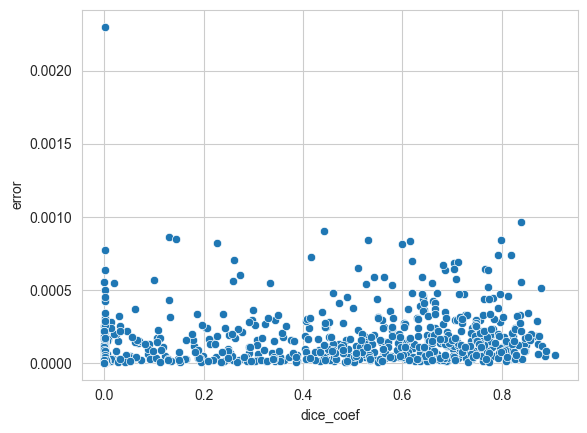

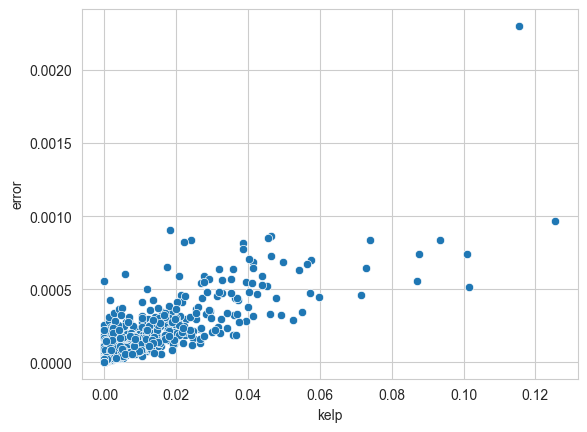

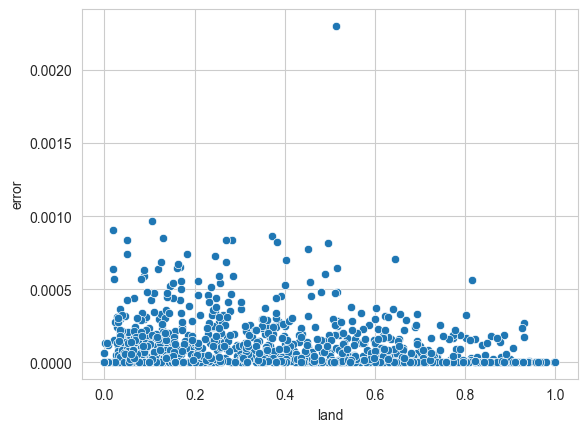

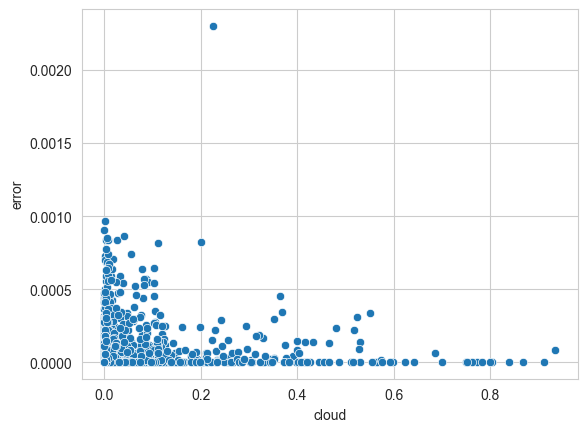

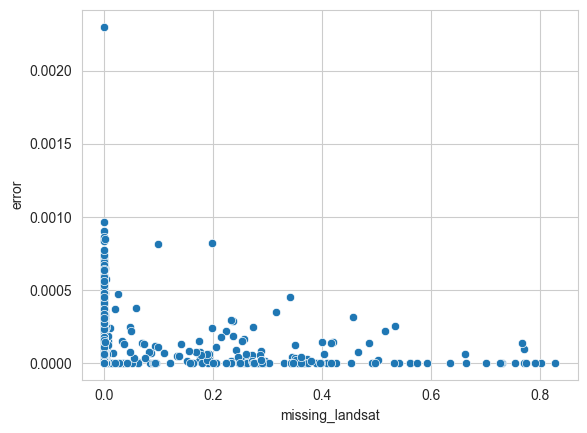

In [19]:
# Plot scatterplots of error
for col in ['dice_coef','kelp', 'land', 'cloud', 'missing_landsat']:
    sns.scatterplot(data=results, x=col, y='error')
    plt.show()

# Plots against dice coef

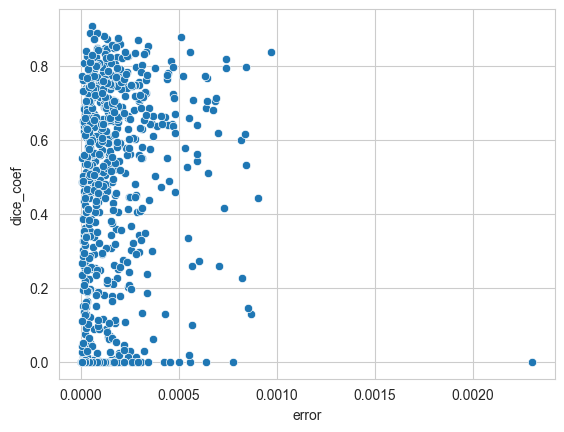

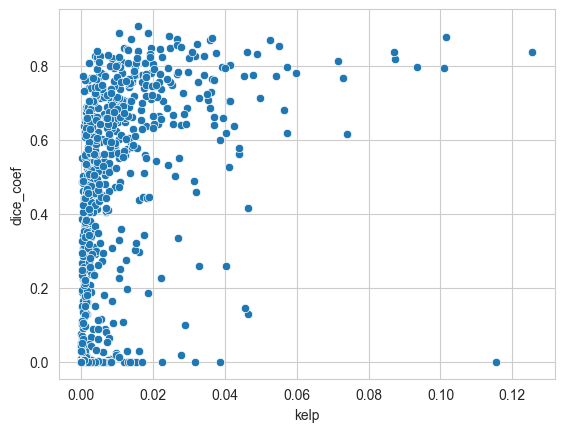

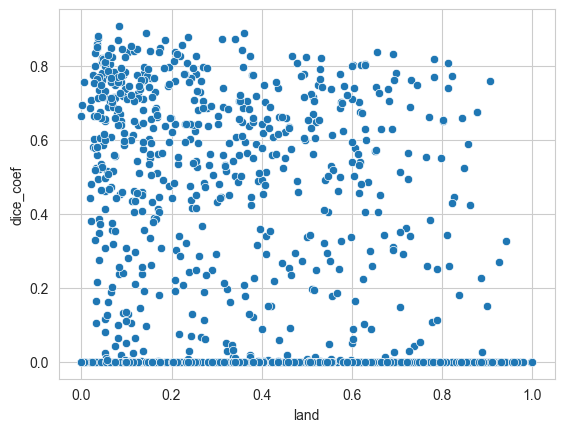

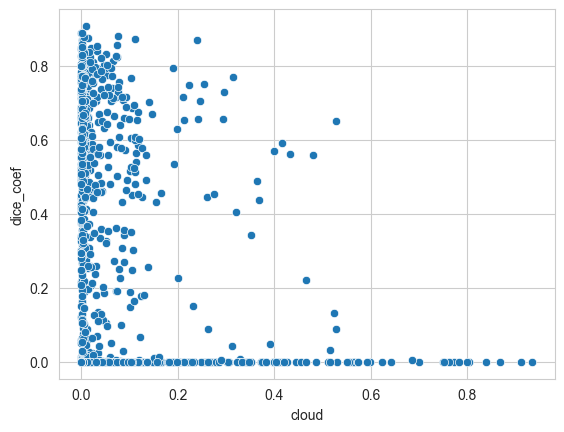

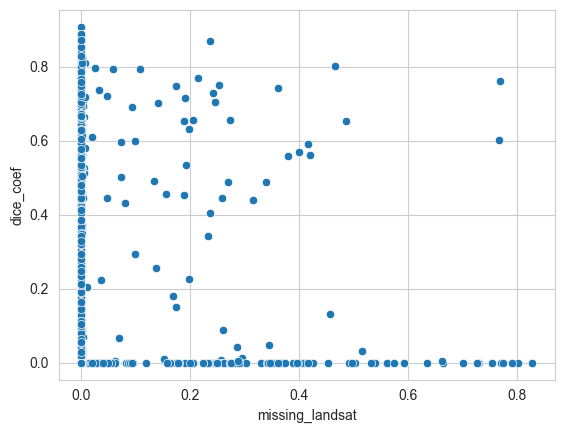

In [20]:
for col in ['error','kelp', 'land', 'cloud', 'missing_landsat']:
    sns.scatterplot(data=results, x=col, y='dice_coef')
    plt.show()

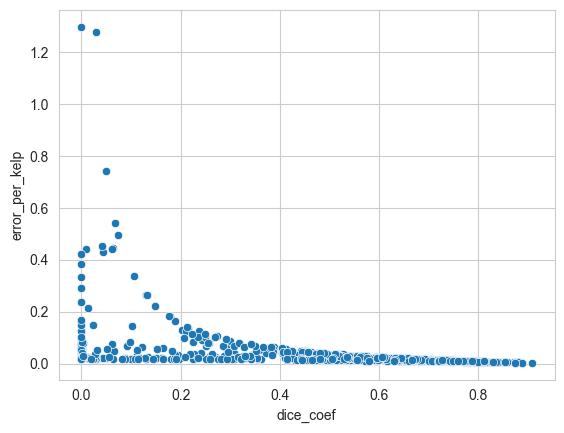

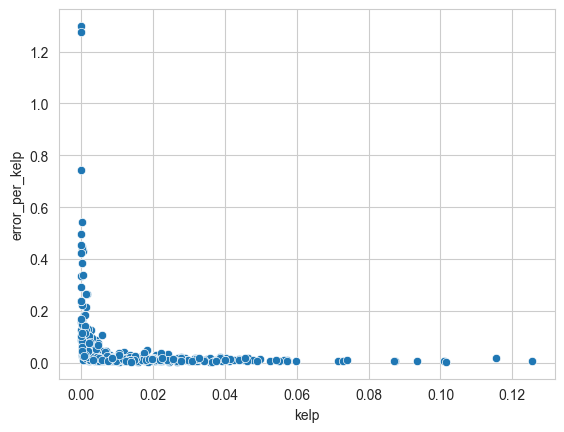

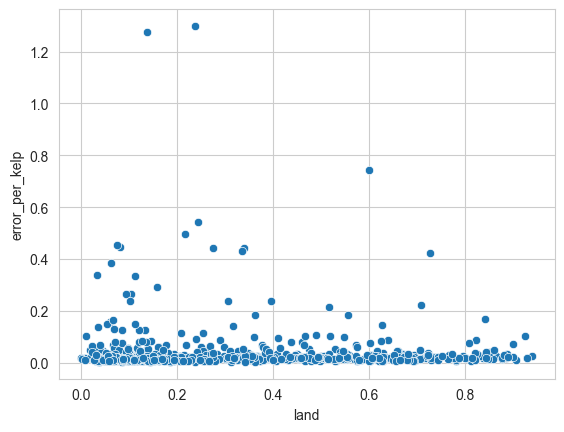

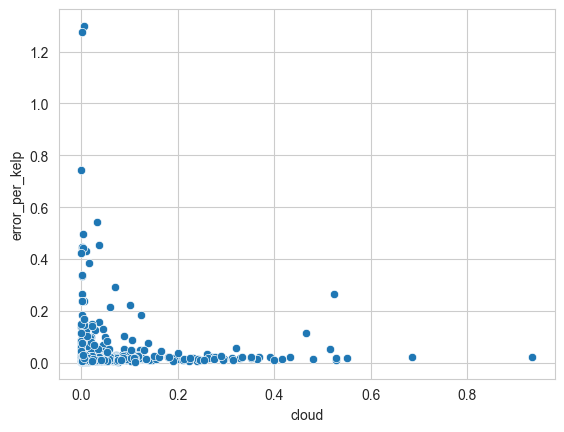

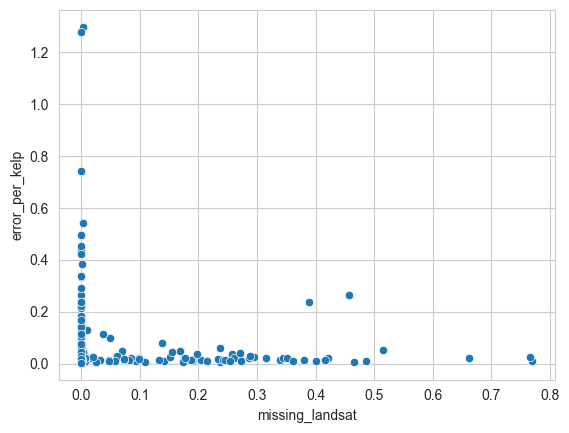

In [23]:
# There is a clear correlation between error and kelp. 
# Create a new column that is the error divided by kelp
# Then make the plots against error again
results['error_per_kelp'] = results['error'] / results['kelp']


# remove outliers with an error_per_kelp larger than n stds
n = 2
results_clean = results[results['kelp'] > 0]
mean = results_clean['error_per_kelp'].mean()
stds = results_clean['error_per_kelp'].std()
results_clean = results_clean[results_clean['error_per_kelp'] < mean + n*stds]


for col in ['dice_coef','kelp', 'land', 'cloud', 'missing_landsat']:
    
    sns.scatterplot(data=results_clean, x=col, y='error_per_kelp')
    plt.show()